# 📘 Student Performance Dataset Analysis

## 🔹 Step 1: Load Dataset

We load the student performance dataset using pandas.
Since the file is semicolon-separated (;), we specify the separator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student-mat.csv" , sep=";", quotechar='"')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## 🔹 Step 2: Explore & Clean Data

Check for missing values using .isnull().sum().

Remove duplicate records using .drop_duplicates().

Inspect shape (rows × columns) and data types.

In [3]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
data.drop_duplicates()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
data.shape

(395, 33)

In [6]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## 🔹 Step 3: Analysis Questions

Average Final Grade (G3):
We calculate the mean of the final grade column.

How many students scored above 15?
We count students with G3 > 15.

Is Study Time correlated with Performance?
We check correlation between studytime and G3.

Which Gender performs better on average?
We group the dataset by sex and compare average grades.

In [7]:
avg_grade = data["G3"].mean()

In [8]:
avg_grade

np.float64(10.415189873417722)

In [9]:
count = (data["G3"] > 15).sum()

In [10]:
count

np.int64(40)

In [11]:
corr = data['studytime'].corr(data['G3'])

In [12]:
gender = data.groupby("sex")["G3"].mean()

In [13]:
print(f"""
Average final grade (G3) -> {avg_grade}
Students scored above 15 -> {count}
study time correlated with performance -> {corr}
Gender performed better on average -> Male: {gender["M"]} | Female: {gender["F"]}
""")


Average final grade (G3) -> 10.415189873417722
Students scored above 15 -> 40
study time correlated with performance -> 0.0978196896531963
Gender performed better on average -> Male: 10.914438502673796 | Female: 9.966346153846153



## 🔹 Step 4: Visualizations

Histogram of Grades (G3):
Shows distribution of students’ final grades.

Scatterplot: Study Time vs Grades:
Helps visualize relationship between study time and performance.

Bar Chart: Male vs Female Average Score:
Compares male and female average grades.

Text(0.5, 1.0, 'Distribution of Final Grades (G3)')

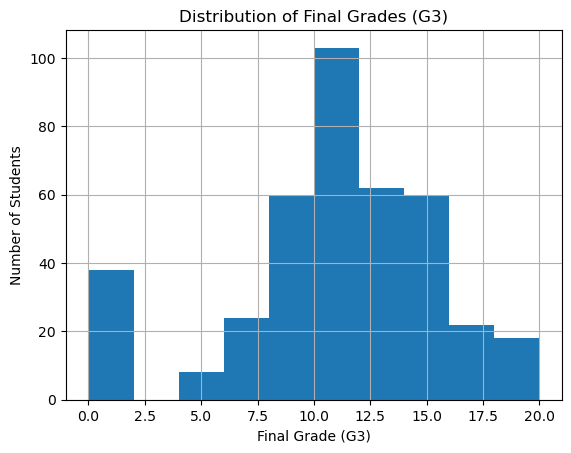

In [14]:
data['G3'].hist()
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades (G3)")

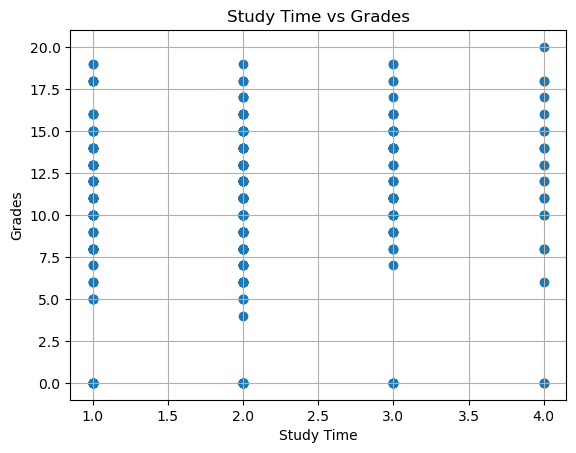

In [15]:
plt.scatter(data["studytime"] , data["G3"])
plt.xlabel("Study Time")
plt.ylabel("Grades")
plt.title("Study Time vs Grades")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Female vs  Male Average Score. ')

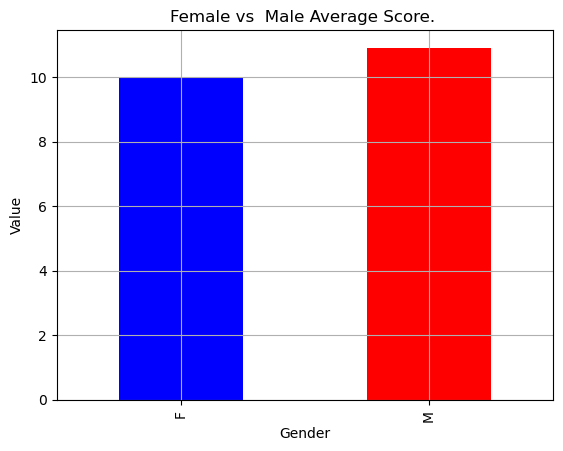

In [16]:
data.groupby('sex')['G3'].mean().plot(kind="bar" , color=["blue" , "red"])
plt.xlabel("Gender")
plt.ylabel("Value")
plt.grid()
plt.title("Female vs  Male Average Score. ")

## 🔹Conclusion

Summarize findings, for example:

The average final grade is around 10.415189873417722.

About 40 students scored above 15.

Study time has a weak/strong correlation with performance.

On average, Male students perform better.